In [43]:
# mengimport library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import matplotlib.image as mpimg
from skimage import data

In [44]:
# membaca gambar di folder
image = cv2.imread('orange.jpg', 0)

In [45]:
# penerapan Histogram Equalization (HE)
# menggunakan fungsi equalisasi histogram
image_equalized = cv2.equalizeHist(image)

In [46]:
#Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)
# membuat objek CLAHE
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) # untuk membuat objek CLAHE

# Apply CLAHE to the original image
# membuatgambar original menjadi CLAHE
image_clahe = clahe.apply(image)

In [47]:
# Penerapan metode Contrast Stretching (CS)
# Create an empty array to store the final output
# membuat array baru 
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8') 

# Apply Min-Max Contrasting
# menghitung nilai piksel terkecil dan terbesar
min = np.min(image) 
max = np.max(image) 

# melakukan iterasi setiap piksel menggunakan dua loop
for i in range(image.shape[0]): 
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)


In [48]:
#Penerapan Metode Perkalian Konstanta
# menyalin gambar dan mengubah tipe gambarnya menjadi float
copyCamera = image.copy().astype(float) 

# menampilkan dimensi gambar yang telah disalin dan membuat array kosong dengan dimensi gambar salinan
m1,n1 = copyCamera.shape 
output1 = np.empty([m1, n1]) 

# melakukan iterasi setiap piksel menggunakan dua loop
for baris in range(0, m1-1): 
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9 # Menghitung dan menetapkan nilai kontras yang telah ditingkatkan ke setiap piksel dalam array


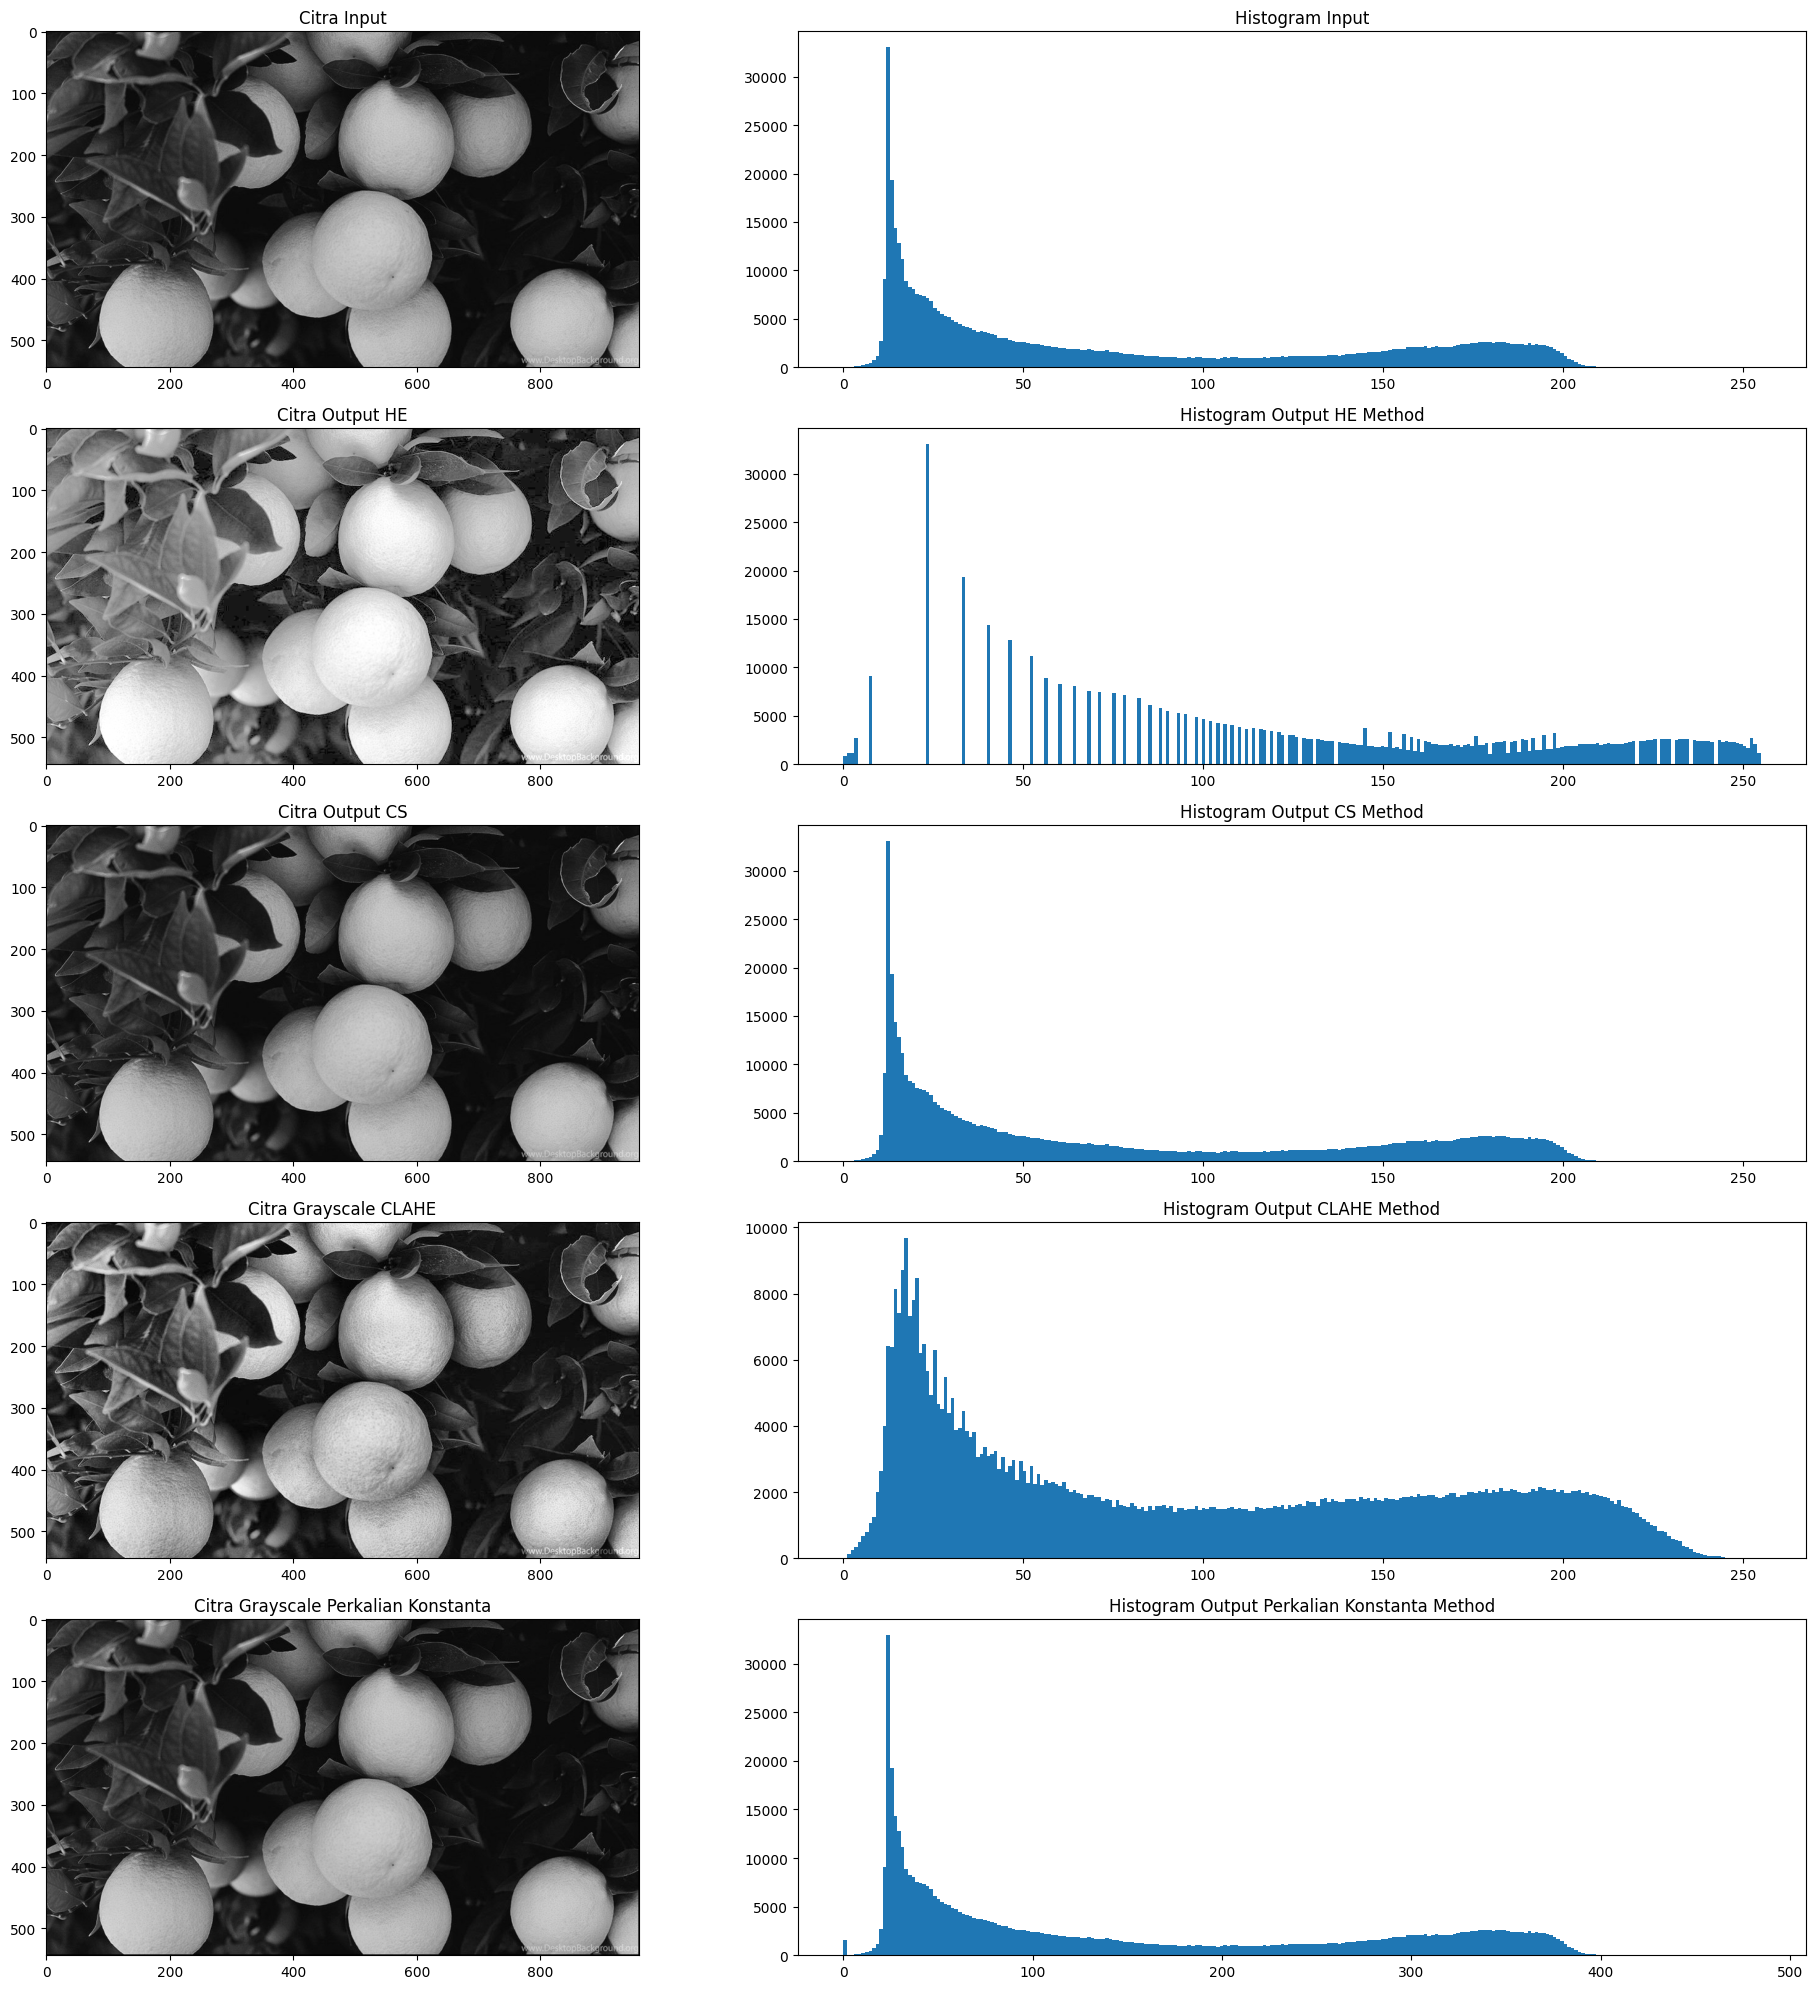

In [49]:
#Plot Image
# membuat sebuah gambar dengan ukuran 20x20 dan axes 5x2  
fig, axes = plt.subplots(5, 2, figsize=(20, 20)) 
ax = axes.ravel() 

#menampilkan citra beserta title dan histogramnya
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout() 